In [8]:
import numpy as np
#ODE PARAMETER======================================#
d_ball = 0.240
M_ball = 0.600
Cd_ball = 0.54
r_ball = d_ball/2
A_ball = np.pi*(r_ball**2)

Y0_ball = 0.20

#Env Param
rho = 1.204

#Target Param
Y_Target = 2.43

#ODE CONSTANT
a_const=-9.81
b_const=-(Cd_ball*rho)/(2*M_ball)
print (a_const,b_const)

-9.81 -0.5418000000000001


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ODE system definition
def ode_system(t, state, a, b):
    x, y, z, Vx, Vy, Vz = state
    dxdt = Vx
    dydt = Vy
    dzdt = Vz
    dVxdt = a[0] + b[0] * Vx**2
    dVydt = a[1] + b[1] * Vy**2
    dVzdt = a[2] + b[2] * Vz**2
    return [dxdt, dydt, dzdt, dVxdt, dVydt, dVzdt]

# Parameters
a = np.array([0, -10, 0])  # Gravity
b = np.array([0, 0, 0])      # No additional forces
V0_range = np.arange(1, 11, 0.5)  # Initial velocity range
theta_range = np.arange(0, 90, 1)  # Launch angle range
x_hittol=0.035
x_target = 8
hoop_dist = 0.150
# Store results
results = []


##=============================================================##
#Backpost#
X_bp=x_target+0.15
Y_bpmin=2.43-0.525
Y_bpmax=2.43+0.525
COR_bp=0.56

# Loop through each combination of V0 and theta
for V0 in V0_range:
    for theta in theta_range:
        Vy_0 = V0 * np.sin(np.radians(theta))
        Vx_0 = V0 * np.cos(np.radians(theta))
        initial_conditions = [0, 0.02, 0, Vx_0, Vy_0, 2]  # Initial conditions

        # Initialize variables
        time = 0
        x_hit = 0  # Initialize x_hit to zero
        y_target = 2.43  # The target y value to check against

        # Run the simulation until the ball hits the ground (y=0) and time > 0.75
        while True:
            t_span = (time, time + 0.1)  # Simulate for 0.1 seconds
            sol = solve_ivp(ode_system, t_span, initial_conditions, args=(a, b), dense_output=True)

            if sol.success:
                if len(sol.t) > 1:
                    t_eval = np.linspace(sol.t[0], sol.t[1], 10)  # Evaluate at 10 points
                    state_eval = sol.sol(t_eval)

                    # Check for y values close to 2.43
                    for m in range(len(state_eval[1])):
                        if np.isclose(state_eval[1, m], y_target, atol=0.2):  # Check if y is approximately 2.43
                            x_hit = state_eval[0, m]  # Update x_hit with the corresponding x value
                    
                    # Update the initial conditions for the next iteration
                    initial_conditions = state_eval[:, -1]  # Use the last state as the new initial conditions
                    time = sol.t[-1]  # Update the current time

                    # Break the loop if the ball hits the ground and time is greater than 0.75
                    if state_eval[1, -1] <= 0 and time > 0.75:
                        break
            else:
                print("Integration did not succeed.")
                break

        # Determine the score based on x_hit
        if x_hit == 0:
            score = 0
        elif (x_target-x_hittol)<=x_hit<=(x_target+x_hittol):
            score = 1
        else:
            score = 0

        # Store the result for this combination of V0 and theta
        results.append((theta, V0, score,x_hit))

# Print the results
print("Theta\tV0\tScore\tX_hit")
for theta, V0, score, x_hit in results:
    print(f"{theta}\t{V0:.1f}\t{score}\t{x_hit}")

print("this is evaluated within range", (x_target-x_hittol), "and", (x_target+x_hittol))



Theta	V0	Score	X_hit
0	1.0	0	0
1	1.0	0	0
2	1.0	0	0
3	1.0	0	0
4	1.0	0	0
5	1.0	0	0
6	1.0	0	0
7	1.0	0	0
8	1.0	0	0
9	1.0	0	0
10	1.0	0	0
11	1.0	0	0
12	1.0	0	0
13	1.0	0	0
14	1.0	0	0
15	1.0	0	0
16	1.0	0	0
17	1.0	0	0
18	1.0	0	0
19	1.0	0	0
20	1.0	0	0
21	1.0	0	0
22	1.0	0	0
23	1.0	0	0
24	1.0	0	0
25	1.0	0	0
26	1.0	0	0
27	1.0	0	0
28	1.0	0	0
29	1.0	0	0
30	1.0	0	0
31	1.0	0	0
32	1.0	0	0
33	1.0	0	0
34	1.0	0	0
35	1.0	0	0
36	1.0	0	0
37	1.0	0	0
38	1.0	0	0
39	1.0	0	0
40	1.0	0	0
41	1.0	0	0
42	1.0	0	0
43	1.0	0	0
44	1.0	0	0
45	1.0	0	0
46	1.0	0	0
47	1.0	0	0
48	1.0	0	0
49	1.0	0	0
50	1.0	0	0
51	1.0	0	0
52	1.0	0	0
53	1.0	0	0
54	1.0	0	0
55	1.0	0	0
56	1.0	0	0
57	1.0	0	0
58	1.0	0	0
59	1.0	0	0
60	1.0	0	0
61	1.0	0	0
62	1.0	0	0
63	1.0	0	0
64	1.0	0	0
65	1.0	0	0
66	1.0	0	0
67	1.0	0	0
68	1.0	0	0
69	1.0	0	0
70	1.0	0	0
71	1.0	0	0
72	1.0	0	0
73	1.0	0	0
74	1.0	0	0
75	1.0	0	0
76	1.0	0	0
77	1.0	0	0
78	1.0	0	0
79	1.0	0	0
80	1.0	0	0
81	1.0	0	0
82	1.0	0	0
83	1.0	0	0
84	1.0	0	0
85	1.0	0	0
86	1.0	0	0
87	1.0	0	0
88	1.0	0	0
89	1.0	0	0

Collision detected at time 0.00s: Vx = 3.38, Vy = 2.31
Last coordinates before collision: x = 2.00, y = 2.43
2.00257984632876	2.427870325134321	3.379025425452018	2.3032485042142943
True
x hit before collision:  1.9999972631629703
1.9999972631629703
2.000551316746612
1.9985205552409253
1.9964875568948677
1.9944523167753414
1.9924148299329112
1.990375091401733
1.9883330961994805
1.9862888393272724
1.9842423157695994
1.9821935204942496
1.9801424484522347
1.9780890945777156
1.9760334537879265
1.9739755209831003
1.9719152910463922
1.9698527588438037
1.9677879192241052
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987989918
1.9674176987

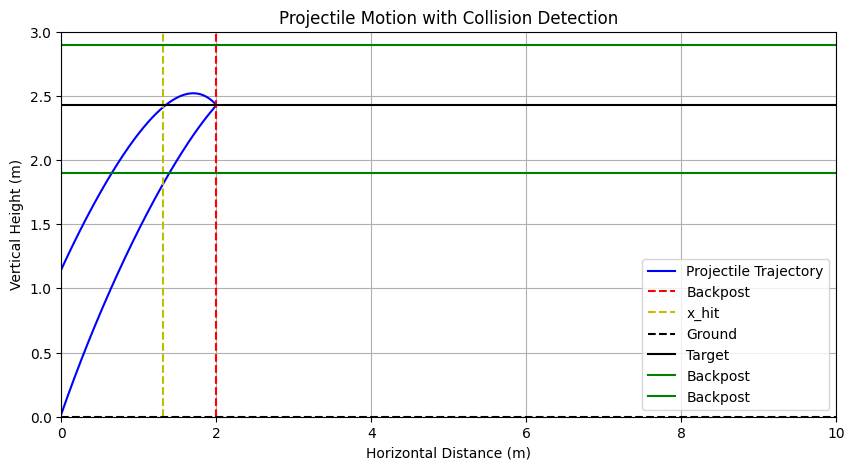

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ODE system definition
def ode_system(t, state, a, b):
    x, y, z, Vx, Vy, Vz = state
    dxdt = Vx
    dydt = Vy
    dzdt = Vz
    dVxdt = a[0] + b[0] * Vx**2
    dVydt = a[1] + b[1] * Vy**2
    dVzdt = a[2] + b[2] * Vz**2
    return [dxdt, dydt, dzdt, dVxdt, dVydt, dVzdt]

# Function to check for collision with the backpost
def check_collision(state, backpost_x, backpost_height_min, backpost_height_max):
    x, y = state[0], state[1]
    return backpost_x <= x <= backpost_x + 0.1 and backpost_height_min <= y <= backpost_height_max

# Parameters
a = np.array([0, a_const, 0])  # Gravity
b = np.array([b_const,b_const,b_const])      # drag
V0 = 20  # Initial velocity
theta = 60  # Launch angle in degrees
Vy_0 = V0 * np.sin(np.radians(theta))
Vx_0 = V0 * np.cos(np.radians(theta))
initial_conditions = [0, 0.02, 0, Vx_0, Vy_0, 0]  # Initial conditions

# Backpost parameters
backpost_x = 2  # x position of the backpost
backpost_height_min = 1.9  # Minimum height of the backpost
backpost_height_max = 2.9  # Maximum height of the backpost
COR = 0.60  # Coefficient of restitution for the backpost
x_bounce = 0
y_bounce = 0
z_bounce = 0
vx_bounce = 0
vy_bounce = 0
vz_bounce = 0

# Initialize variables
time = 0
collision_detected = False  # Flag to indicate if a collision has occurred

# Lists to store trajectory data
x_values = []
y_values = []
x_hit=0
# Run the simulation until the ball hits the ground (y=0) or the backpost
is_collide=False
while True:
    t_span = (time, time + 0.001)  # Simulate for 0.1 seconds
    sol = solve_ivp(ode_system, t_span, initial_conditions, args=(a, b), dense_output=True)

    if sol.success:
        if len(sol.t) > 1:
            t_eval = np.linspace(sol.t[0], sol.t[1], 1000)  # Evaluate at 10 points
            state_eval = sol.sol(t_eval)

            # Store trajectory data
            x_values.extend(state_eval[0])
            y_values.extend(state_eval[1])

            
                       
            #============VALUE CHECK===============#
            for m in range(len(state_eval[1])):
                if check_collision(state_eval[:, m], backpost_x, backpost_height_min, backpost_height_max):
                    print(f"Collision detected at time {time:.2f}s: Vx = {state_eval[3, m]:.2f}, Vy = {state_eval[4, m]:.2f}")  # Debug output
                    print(f"Last coordinates before collision: x = {state_eval[0, m]:.2f}, y = {state_eval[1, m]:.2f}")  # Print last coordinates
                    collision_detected = True
                    break  # Exit the loop if a collision is detected

                if np.isclose(state_eval[1, m], y_target, atol=0.02):  # Check if y is approximately 2.43
                    x_hit = state_eval[0, m]  # Update x_hit with the corresponding x value
            
            # Check if the projectile has hit the ground
            if state_eval[1, -1] <= 0:
                print("Projectile hit the ground.")
                print(f"Last coordinates before hitting the ground: x = {state_eval[0, -1]:.2f}, y = {state_eval[1, -1]:.2f}")  # Print last coordinates
                break  # Exit the main loop if the projectile hits the ground

            if collision_detected:
                is_collide=True
                x_bounce=state_eval[0,-1]
                y_bounce=state_eval[1,-1]
                z_bounce=state_eval[2,-1]
                vx_bounce=state_eval[3,-1]
                vy_bounce=state_eval[4,-1]
                vz_bounce=state_eval[5,-1]
                break  # Exit the main loop if a collision with the backpost has occurred


            # Update initial conditions for the next iteration
            initial_conditions = state_eval[:, -1]  # Use the last state as the new initial conditions

print(f"{x_bounce}\t{y_bounce}\t{vx_bounce}\t{vy_bounce}")
print(is_collide)
print ("x hit before collision: ", x_hit)
#===============================================Rebound=====================================//
if is_collide: 
    bounce_initial_conditions = [x_bounce, y_bounce, z_bounce, vx_bounce * (-COR), vy_bounce * COR, vz_bounce * COR]
    # iteration_count = 0  # Initialize a counter for iterations
    # max_iterations = 1000  # Set the maximum number of iterations

    while True:
        t_span = (time, time + 0.001)  # Simulate for 0.1 seconds
        sol = solve_ivp(ode_system, t_span, bounce_initial_conditions, args=(a, b), dense_output=True)

        if sol.success:
            if len(sol.t) > 1:
                t_eval = np.linspace(sol.t[0], sol.t[1], 1000)  # Evaluate at 10 points
                state_eval = sol.sol(t_eval)

                # Store trajectory data
                x_values.extend(state_eval[0])
                y_values.extend(state_eval[1])
                print(x_hit)
                # Check for collision with the backpost
                # (You can add your collision detection logic here)
                for m in range(len(state_eval[1])):
                    if np.isclose(state_eval[1, m], y_target, atol=0.02):  # Check if y is approximately 
                        x_hit = state_eval[0, m]
                        
                        
                # Check if the projectile has hit the ground
                if state_eval[1, -1] <= 0:
                    print("Projectile hit the ground.")
                    # print(f"Last coordinates before hitting the ground: x = {state_eval[0, -1]:.2f}, y = {state_eval[1, -1]:.2f}")  # Print last coordinates
                    print("last x hit", x_hit)
                    break  # Exit the main loop if the projectile hits the ground

                # Update initial conditions for the next iteration
                bounce_initial_conditions = state_eval[:, -1]  # Use the last state as the new initial conditions  

        # iteration_count += 1  # Increment the iteration counter
        # if iteration_count >= max_iterations:  # Check if the maximum number of iterations has been reached
        #     print("Maximum iterations reached.")
        #     break  # Exit the loop if the maximum number of iterations is reached

    is_collide = False        

print(x_hit)
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label='Projectile Trajectory', color='blue')
plt.axvline(x=backpost_x, color='red', linestyle='--', label='Backpost')
plt.axvline(x=x_hit, color='y', linestyle='--', label='x_hit')
plt.axhline(y=0, color='black', linestyle='--', label='Ground')
plt.axhline(y=y_target, color='black', linestyle='-', label='Target')
plt.axhline(y=backpost_height_max, color='g', linestyle='-', label='Backpost')
plt.axhline(y=backpost_height_min, color='g', linestyle='-', label='Backpost')

plt.title('Projectile Motion with Collision Detection')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Height (m)')
plt.legend()
plt.grid()
plt.xlim(0, 10)
plt.ylim(0, 3)
plt.show()

Furthest black point: v0 = 0.15, theta = 23.0, score = 1.0


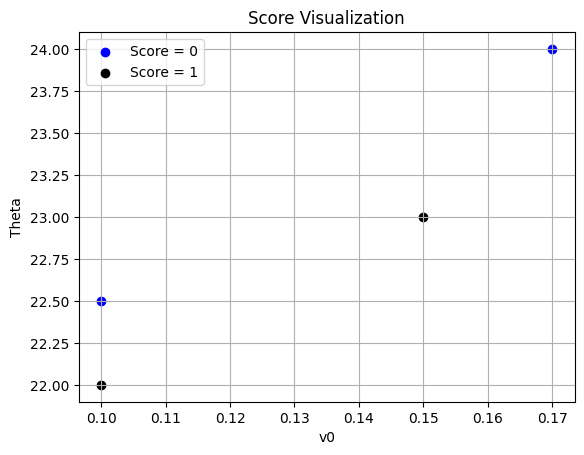

In [ ]:
#==================================DATA MINING==========================# 

import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = np.array([
    [0.1, 22.5, 0],
    [0.15, 23, 1],
    [0.1, 22, 1],
    [0.17, 24, 0],
    # Add more data points as needed
])

# Separate the data into v0, theta, and score
v0 = data[:, 0]
theta = data[:, 1]
score = data[:, 2]

# Identify black and white points
black_points = data[score == 1]
white_points = data[score == 0]

# Initialize variables to find the black point furthest from any white point
max_min_distance = -1
furthest_black_point = None

# Calculate distances
for black in black_points:
    v0_black, theta_black = black[0], black[1]
    
    # Calculate distances to all white points
    distances = np.sqrt((white_points[:, 0] - v0_black) ** 2 + (white_points[:, 1] - theta_black) ** 2)
    
    # Find the minimum distance to any white point
    min_distance = np.min(distances)
    
    # Check if this is the maximum of the minimum distances found
    if min_distance > max_min_distance:
        max_min_distance = min_distance
        furthest_black_point = black

# Output the result
if furthest_black_point is not None:
    print(f"Furthest black point: v0 = {furthest_black_point[0]}, theta = {furthest_black_point[1]}, score = {furthest_black_point[2]}")
else:
    print("No black points found.")

# Optional: Plotting the results
plt.scatter(v0[score == 0], theta[score == 0], color='blue', label='Score = 0')
plt.scatter(v0[score == 1], theta[score == 1], color='black', label='Score = 1')
plt.title('Score Visualization')
plt.xlabel('v0')
plt.ylabel('Theta')
plt.legend()
plt.grid()
plt.show()